<a href="https://colab.research.google.com/github/5Ugam/5Ugam/blob/main/us_accident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accident-analysis')
jovian.set_colab_id('1vD5ww7m17n6--bPkY4mqYkJjffg3ooUW')

     |████████████████████████████████| 68 kB 2.7 MB/s 


# us-accident-analysis

Use the "Run" button to execute the code.

In [3]:
!pip install jovian --upgrade --quiet

In [4]:
import jovian

In [5]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accident-analysis")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/sugams342/us-accident-analysis


'https://jovian.ai/sugams342/us-accident-analysis'

# US Accidents Exploratory Data Analysis
TODO -talk about EDA \
TODO -talk about the dataset (source, what it contains, how it will be useful)
- Kaggle
- Information about accidents
- can be useful to prevent accidents

In [6]:
pip install opendatasets --upgrade --quiet

In [7]:
import opendatasets as od
url_dataset = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(url_dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sugxm00
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:02<00:00, 136MB/s]


In [8]:
data ='/content/us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preperation and Cleaning
- Load the file using pandas 
- Look at some info about the file
- Fix any missing or incorrect values

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(data)

In [11]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [12]:
df.shape

(2845342, 47)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [14]:
# Finding out the na values in the dataframe
na_values = df.isna().sum(axis=0)
# Filtering out the columns which has 0 missing values 
missing_values=(na_values[na_values>0]).sort_values(ascending=False)
print(f"The columns containing na values are in sorted order is  : \n{missing_values}")

The columns containing na values are in sorted order is  : 
Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Sunrise_Sunset              2867
Civil_Twilight              2867
Nautical_Twilight           2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
dtype: int64


In [15]:
# % of missing values per column
missing_percentages = (missing_values/len(df))*100
print(f"The percentage of missing values are: \n {missing_percentages}")

The percentage of missing values are: 
 Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Sunrise_Sunset            0.100761
Civil_Twilight            0.100761
Nautical_Twilight         0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64


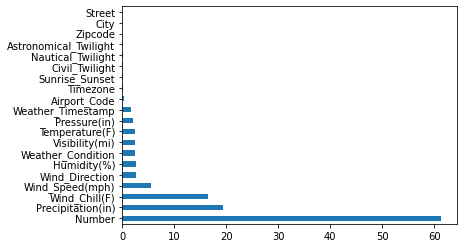

In [16]:
# Plotting the missing values using pandas
missing_percentages.plot(kind='barh')

## Exploratory analysis and Visualization
1. Columns we'll analyze:\
a. City\
b. Start Time\
c. Start Lat, Start Lon\
d. Temperature\
e. Weather Condition\


In [17]:
df.City

0               Dublin
1               Dayton
2           Cincinnati
3                Akron
4           Cincinnati
              ...     
2845337      Riverside
2845338      San Diego
2845339         Orange
2845340    Culver City
2845341       Highland
Name: City, Length: 2845342, dtype: object

In [18]:
cities = df.City.nunique()
cities


11681

In [19]:
# Filtering out top 20 cities which has highest no of accidents
cities_by_accident = df.City.value_counts()
top_cities_by_accident=cities_by_accident[:20]
top_cities_by_accident

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

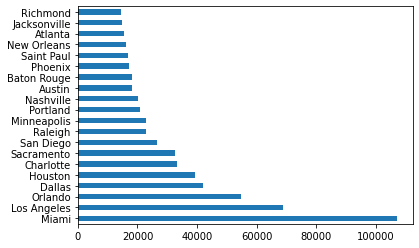

In [20]:
top_cities_by_accident.plot(kind='barh')

In [21]:
# Finding out the no of accidents in New York
cities_by_accident[cities_by_accident.index=='New York']

New York    7068
Name: City, dtype: int64

In [22]:
import seaborn as sns
sns.set_style('darkgrid')

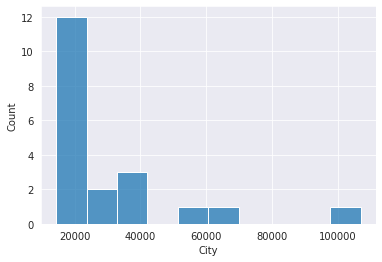

In [23]:
sns.histplot(top_cities_by_accident,bins=10)

In [24]:
high_accident_cities = cities_by_accident[cities_by_accident>=1000]
low_accident_cities = cities_by_accident[cities_by_accident<1000]

In [25]:
(len(high_accident_cities)/cities)*100

4.246211796935194

In [26]:
(len(low_accident_cities)/cities)*100

95.7537882030648

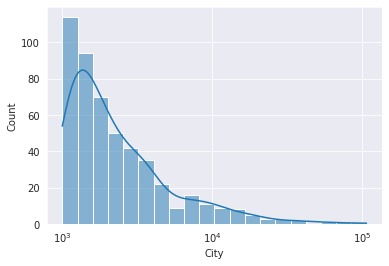

In [27]:
sns.histplot(high_accident_cities,kde=True,bins=20,log_scale=10)

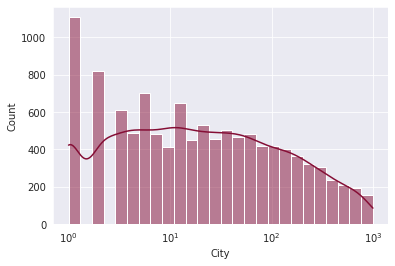

In [28]:
# Histplot for the low accident cities
sns.histplot(low_accident_cities,kde=True,log_scale=10,color='#850E35')
  

In [29]:
cities_by_accident[cities_by_accident==1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

### Start Time

In [30]:
df.Start_Time=pd.to_datetime(df['Start_Time'])

In [31]:
df.Start_Time[0].time()

datetime.time(0, 37, 8)

In [41]:
def f1(X):
  hr,min,sec = X.hour,X.minute,X.second
  return f'{hr}:{min}:{sec}'

df['time_custom'] = df.loc[:20,'Start_Time'].map(f1)

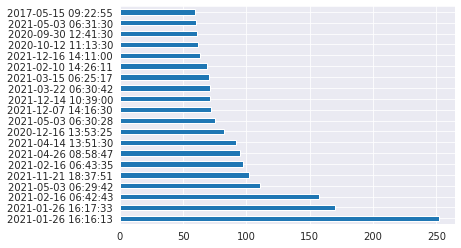

In [43]:
# Which time of the day has most accidents
most_accidents = df.Start_Time.value_counts()[:20]
most_accidents.plot(kind='barh')

In [38]:
df['Start_Time'][0].minute

37

In [42]:
df['time_custom']

0           0:37:8
1          5:56:20
2          6:15:39
3          6:51:45
4          7:53:43
            ...   
2845337        NaN
2845338        NaN
2845339        NaN
2845340        NaN
2845341        NaN
Name: time_custom, Length: 2845342, dtype: object

% of accidents happening

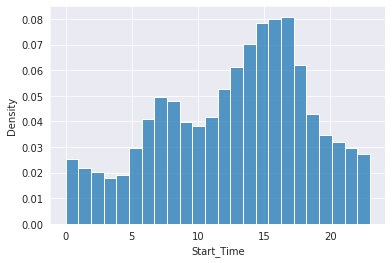

In [53]:
sns.histplot(df.Start_Time.dt.hour,bins=24,kde=False,stat='density')

<b>Note<b> : About 80% of accidents have occured between 10 AM to 17 PM and after that it has decreased. \
About 50% of total accidents have occured between 5 AM to 6 AM

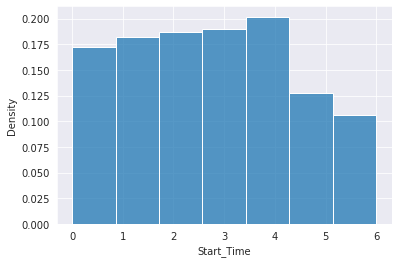

In [76]:
# Which day of week have the most accidents
dayofweek = df['Start_Time'].dt.dayofweek
sns.histplot(dayofweek,bins=7,stat='density')

In [77]:
dayofweek.value_counts()

4    492074
3    463477
2    455037
1    443968
0    419821
5    311691
6    259274
Name: Start_Time, dtype: int64

Is the distribution of accident by hour the same on weekend as on weekdays ?

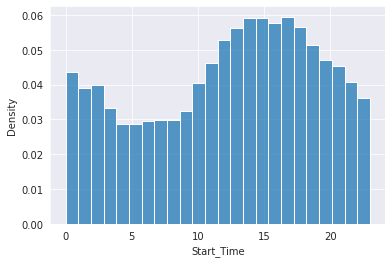

In [87]:
sundays = df.Start_Time[df.Start_Time.dt.dayofweek == 6]  # We extracted sunday
sns.histplot(sundays.dt.hour,bins=24,stat='density')

In sundays late night accidents are comparitively more than that on Mondays

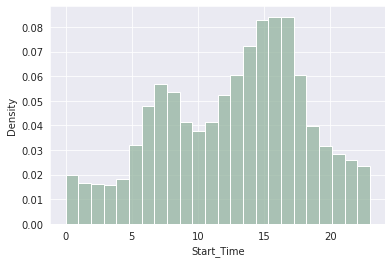

In [97]:
mondays = df.Start_Time[df.Start_Time.dt.dayofweek == 0]  # We extracted mondays
sns.histplot(mondays.dt.hour,bins=24,stat='density',color='#94B49F')

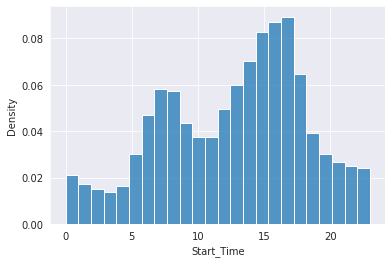

In [91]:
mondays = df.Start_Time[df.Start_Time.dt.dayofweek == 1]  # We extracted tuesday
sns.histplot(mondays.dt.hour,bins=24,stat='density')

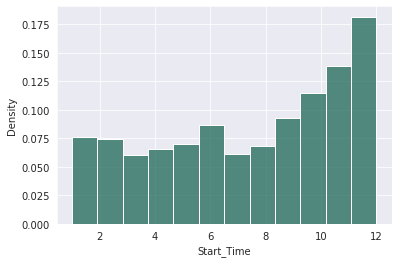

In [96]:
sns.histplot(df.Start_Time.dt.month,bins=12,kde=False,stat='density',color='#1C6758')

Can you explain the month-wise trend of accidents ? \
This can be of weather (winter season) \
As there is holiday as well for the Christmas\ 
Lets check this for couple of years ! 

Text(0.5, 1.0, '2021')

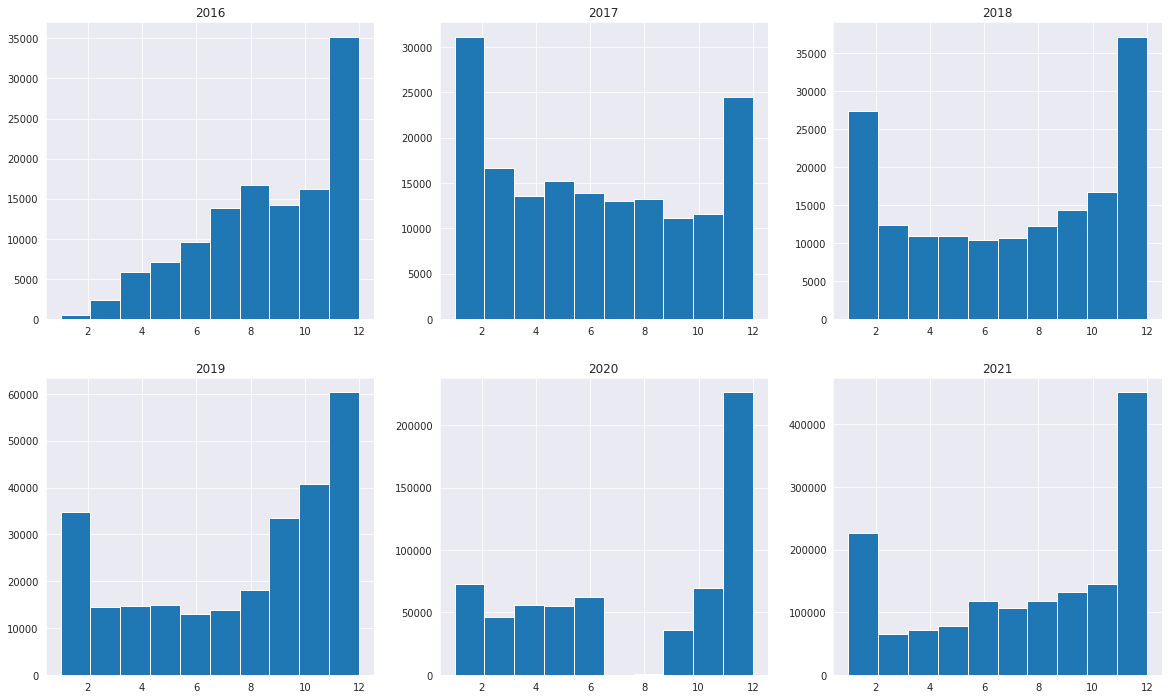

In [116]:
df_2016 = df[df['Start_Time'].dt.year==2016]
df_2017 = df[df['Start_Time'].dt.year==2017]
df_2018 = df[df['Start_Time'].dt.year==2018]
df_2019 = df[df['Start_Time'].dt.year==2019]
df_2020 = df[df['Start_Time'].dt.year==2020]
df_2021 = df[df['Start_Time'].dt.year==2021]

fig , axes = plt.subplots(2,3,figsize=(20,12))
axes[0,0].hist(df_2016['Start_Time'].dt.month)
axes[0,0].set_title("2016")

axes[0,1].hist(df_2017['Start_Time'].dt.month)
axes[0,1].set_title("2017")

axes[0,2].hist(df_2018['Start_Time'].dt.month)
axes[0,2].set_title("2018")

axes[1,0].hist(df_2019['Start_Time'].dt.month)
axes[1,0].set_title("2019")

axes[1,1].hist(df_2020['Start_Time'].dt.month)
axes[1,1].set_title("2020")

axes[1,2].hist(df_2021['Start_Time'].dt.month);
axes[1,2].set_title("2021")

Every other year the trend seems to fine that most of the accidents occur in end of the year in US except 2017 because on Jan 2017 election was happening there which seems the main cause

In [105]:
df_2016.Start_Time

0        2016-02-08 00:37:08
1        2016-02-08 05:56:20
2        2016-02-08 06:15:39
3        2016-02-08 06:51:45
4        2016-02-08 07:53:43
                 ...        
137506   2016-01-14 20:18:33
150136   2016-01-14 20:18:33
150281   2016-01-14 20:18:33
158327   2016-01-14 20:18:33
161276   2016-01-14 20:18:33
Name: Start_Time, Length: 122024, dtype: datetime64[ns]

## Ask and answer Questions
1. Are there more accdients in warmer or colder areas ?
2. Which 5 states have the highest number of accidents ? How about per capita?
3. Does New York show up in the data ? 
If yes, why is the count lower if it is the most popular city ?
4. Among the top 100 cities in no of accidents, which states do they belong to most frequently
5. What time of the day are accidents most frequent in ?
6. Which days of the week have the most accidents ?
7. Which months have the most accidents ?
8. What is the trend of accidents year over year (decreasing/Increasing?)
9. When is accident per unit of traffic the highest ?

## Summery and Conclusion

Insights: \
1. 4.24% of cities have more than 1000 accidents
2. Over 1100 cities reported just 1 accident(need to investigate)
3. The number of accidents per city decreases exponentially